#Consolidação dos dados

Foi decidido utilizar todos os dados presentes no dataset.



#Primeiramente, baixar as bibliotecas do Python que serão utilizadas.

In [3]:
!pip install feature-engine

# Agora, importar essas bibliotecas.

## Bibliotecas para os gráficos.

In [4]:
import numpy as np
import  pandas as pd
import  seaborn as sns
import  scipy.stats as stats
import  matplotlib.pyplot as plt

import  plotly 
import  plotly.graph_objs as go
import  plotly.io as pio
from plotly.subplots import make_subplots
import  plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import  cufflinks as cf
import  plotly.figure_factory as ff 
from plotly.offline import iplot
from plotly import tools
from ipywidgets import widgets

from feature_engine import transformation as vt
from matplotlib.colors import to_rgba

plt.style.use('seaborn-darkgrid')

# You can go offline on demand by using
cf.go_offline() 
# initiate notebook for offline plot
init_notebook_mode(connected=False)
# set some display options:
plt.rcParams['figure.dpi'] = 100
colors = px.colors.qualitative.Prism
pio.templates.default = "plotly_white"
plotly.offline.init_notebook_mode(connected = True)
import plotly.io as pio
pio.renderers
pio.renderers.default = 'colab'

Output hidden; open in https://colab.research.google.com to view.

## Importar e abrir o Dataset das escolas a ser analisado.

### Importar a partir do próprio Google Drive.

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Agora, abrir o Dataset.

Lembrando que o Dataset deve estar localizado na mesma pasta deste Google Colab.


Este Dataset consiste em dados relativos às escolas públicas e privadas de estados de todo o Brasil.

O intuito desta análise será, primeiramente, retirar informações relevantes a partir desses dados e, por fim, tentar prever se a escola é pública ou privada.

In [64]:
data = pd.read_csv('/content/drive/MyDrive/CES30/Análise - Tabela da lista das escolas - Detalhado.csv' , sep = ';')
data

,Restrição de Atendimento,Escola,Código INEP,UF,Município,Localização,Localidade Diferenciada,Categoria Administrativa,Endereço,Telefone,Dependência Administrativa,Categoria Escola Privada,Conveniada Poder Público,Regulamentação pelo Conselho de Educação,Porte da Escola,Etapas e Modalidade de Ensino Oferecidas,Outras Ofertas Educacionais,Latitude,Longitude
0,ESCOLA ATENDE EXCLUSIVAMENTE ALUNOS COM DEFICI...,EEEE ABNAEL MACHADO DE LIMA - CENE,11000023,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,Pública,"AVENIDA AMAZONAS, 6492 ZONA LESTE. TIRADENTES....",(69) 992083054,Estadual,Não Informado,Não,Não,Entre 51 e 200 matrículas de escolarização,Ensino Fundamental,Atendimento Educacional Especializado,-8.758459,-63.854011
1,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,EMEIEF PEQUENOS TALENTOS,11000040,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,Pública,"RUA CAETANO, 3256 PREDIO. CALADINHO. 76808-108...",(69) 32274273,Municipal,Não Informado,Não,Sim,Entre 201 e 500 matrículas de escolarização,Educação Infantil,NaN,-8.793730,-63.883919
2,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,CENTRO DE ENSINO CLASSE A,11000058,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,Privada,"AVENIDA CARLOS GOMES, 1135 CENTRO. 76801-123 P...",(69) 32244473,Privada,Particular,Não,Sim,Mais de 1000 matrículas de escolarização,"Educação Infantil, Ensino Fundamental, Ensino ...",NaN,-8.760734,-63.901986
3,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,CENTRO EDUCACIONAL PRESBITERIANO 15 DE NOVEMBRO,11000082,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,Privada,"RUA ALMIRANTE BARROSO, 1483 SANTA BARBARA. 768...",(69) 32245636,Privada,Particular,Não,Sim,Entre 51 e 200 matrículas de escolarização,"Educação Infantil, Ensino Fundamental",NaN,-8.765205,-63.896177
4,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,CENTRO EDUC CORA CORALINA,11000104,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,Privada,"RUA MEXICO, 1056 NOVA PORTO VELHO. 76820-190 P...",(69) 32252616,Privada,Particular,Não,Sim,Entre 501 e 1000 matrículas de escolarização,"Educação Infantil, Ensino Fundamental",NaN,-8.768632,-63.875471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218112,ESCOLA PARALISADA,ESC DIVINO MESTRE,53084071,DF,Brasília,Urbana,Não Informado,Privada,"QUADRA QNP 21 CONJUNTO H, CEILANDIA NORTE CEIL...",(61) 35856361,Privada,Não Informado,Não,NaN,NaN,NaN,NaN,NaN,NaN
218113,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,COBIAN - COL BIANGULO,53085000,DF,Brasília,Urbana,A escola não está em área de localização difer...,Privada,"QNJ 22 - LOTES 34 E 36, TAGUATINGA NORTE. 7214...",(61) 34756945,Privada,Particular,Não,Sim,Entre 201 e 500 matrículas de escolarização,"Educação Infantil, Ensino Fundamental",NaN,-15.815942,-48.085109
218114,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,CED VITORIA REGIA,53086007,DF,Brasília,Urbana,A escola não está em área de localização difer...,Privada,"RUA 07 CH 333 LOTE 333/E, SETOR HABITACIONAL V...",(61) 35976668,Privada,Particular,Não,Sim,Entre 51 e 200 matrículas de escolarização,"Ensino Fundamental, Ensino Médio",NaN,NaN,NaN
218115,ESCOLA PARALISADA,CED SANTOS DUMONT - CESAN,53087003,DF,Brasília,Urbana,Não Informado,Privada,"QUADRA 203 CONJUNTO 6, 06/15 LOTES 06 E 15. SE...",(61) 33391545,Privada,Não Informado,Não,NaN,NaN,NaN,NaN,NaN,NaN


É possível perceber que este dataset corresponde a uma **classificação binária** na variável **Categoria Administrativa**, pois a escola pode ser pública ou privada.

Dessa forma, faremos a seguinte atribuição:     

**Na variável Categoria Administrativa** , 'Privada' será atribuída o valor 1 e 'Pública' o valor 0.**

In [65]:
data.replace('Pública',0,inplace=True)
data.replace('Privada',1,inplace=True)

Após essa alteração, visualizar como ficam os dados.

In [66]:
data

,Restrição de Atendimento,Escola,Código INEP,UF,Município,Localização,Localidade Diferenciada,Categoria Administrativa,Endereço,Telefone,Dependência Administrativa,Categoria Escola Privada,Conveniada Poder Público,Regulamentação pelo Conselho de Educação,Porte da Escola,Etapas e Modalidade de Ensino Oferecidas,Outras Ofertas Educacionais,Latitude,Longitude
0,ESCOLA ATENDE EXCLUSIVAMENTE ALUNOS COM DEFICI...,EEEE ABNAEL MACHADO DE LIMA - CENE,11000023,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,0,"AVENIDA AMAZONAS, 6492 ZONA LESTE. TIRADENTES....",(69) 992083054,Estadual,Não Informado,Não,Não,Entre 51 e 200 matrículas de escolarização,Ensino Fundamental,Atendimento Educacional Especializado,-8.758459,-63.854011
1,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,EMEIEF PEQUENOS TALENTOS,11000040,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,0,"RUA CAETANO, 3256 PREDIO. CALADINHO. 76808-108...",(69) 32274273,Municipal,Não Informado,Não,Sim,Entre 201 e 500 matrículas de escolarização,Educação Infantil,NaN,-8.793730,-63.883919
2,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,CENTRO DE ENSINO CLASSE A,11000058,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,1,"AVENIDA CARLOS GOMES, 1135 CENTRO. 76801-123 P...",(69) 32244473,1,Particular,Não,Sim,Mais de 1000 matrículas de escolarização,"Educação Infantil, Ensino Fundamental, Ensino ...",NaN,-8.760734,-63.901986
3,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,CENTRO EDUCACIONAL PRESBITERIANO 15 DE NOVEMBRO,11000082,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,1,"RUA ALMIRANTE BARROSO, 1483 SANTA BARBARA. 768...",(69) 32245636,1,Particular,Não,Sim,Entre 51 e 200 matrículas de escolarização,"Educação Infantil, Ensino Fundamental",NaN,-8.765205,-63.896177
4,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,CENTRO EDUC CORA CORALINA,11000104,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,1,"RUA MEXICO, 1056 NOVA PORTO VELHO. 76820-190 P...",(69) 32252616,1,Particular,Não,Sim,Entre 501 e 1000 matrículas de escolarização,"Educação Infantil, Ensino Fundamental",NaN,-8.768632,-63.875471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218112,ESCOLA PARALISADA,ESC DIVINO MESTRE,53084071,DF,Brasília,Urbana,Não Informado,1,"QUADRA QNP 21 CONJUNTO H, CEILANDIA NORTE CEIL...",(61) 35856361,1,Não Informado,Não,NaN,NaN,NaN,NaN,NaN,NaN
218113,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,COBIAN - COL BIANGULO,53085000,DF,Brasília,Urbana,A escola não está em área de localização difer...,1,"QNJ 22 - LOTES 34 E 36, TAGUATINGA NORTE. 7214...",(61) 34756945,1,Particular,Não,Sim,Entre 201 e 500 matrículas de escolarização,"Educação Infantil, Ensino Fundamental",NaN,-15.815942,-48.085109
218114,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,CED VITORIA REGIA,53086007,DF,Brasília,Urbana,A escola não está em área de localização difer...,1,"RUA 07 CH 333 LOTE 333/E, SETOR HABITACIONAL V...",(61) 35976668,1,Particular,Não,Sim,Entre 51 e 200 matrículas de escolarização,"Ensino Fundamental, Ensino Médio",NaN,NaN,NaN
218115,ESCOLA PARALISADA,CED SANTOS DUMONT - CESAN,53087003,DF,Brasília,Urbana,Não Informado,1,"QUADRA 203 CONJUNTO 6, 06/15 LOTES 06 E 15. SE...",(61) 33391545,1,Não Informado,Não,NaN,NaN,NaN,NaN,NaN,NaN


## Divisão do Dataset

### Agora, iremos dividir o dataset em Treino, Validação e Teste.

In [90]:
def split_dataset(data,y_name,train_ratio=0.7,valid_ratio=0.15):
  #test_ratio=1-valid_ratio-train_ratio
  X_train,X_valid,X_test=np.split(data.sample(frac=1, random_state=42),  [int(train_ratio*len(data)), int((valid_ratio+train_ratio)*len(data))])

  y_train=X_train[y_name].to_frame()
  y_valid=X_valid[y_name].to_frame()
  y_test=X_test[y_name].to_frame()

  y_train.index=X_train.index
  y_valid.index=X_valid.index
  y_test.index=X_test.index

  X_train.drop(labels=[y_name],axis=1,inplace=True)
  X_valid.drop(labels=[y_name],axis=1,inplace=True)
  X_test.drop(labels=[y_name],axis=1,inplace=True)

  return X_train,X_valid,X_test,y_train,y_valid,y_test

In [91]:
X_train,X_valid,X_test,y_train,y_valid,y_test=split_dataset(data,'Categoria Administrativa',train_ratio=0.7,valid_ratio=0.15)

In [69]:
X_train

,Restrição de Atendimento,Escola,Código INEP,UF,Município,Localização,Localidade Diferenciada,Endereço,Telefone,Dependência Administrativa,Categoria Escola Privada,Conveniada Poder Público,Regulamentação pelo Conselho de Educação,Porte da Escola,Etapas e Modalidade de Ensino Oferecidas,Outras Ofertas Educacionais,Latitude,Longitude
97270,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,ESCOLA MUNICIPAL MAE ISABEL,29376629,BA,Euclides da Cunha,Rural,A escola não está em área de localização difer...,"POVOADO RIACHO DOS BOIS, S/N PREDIO ESCOLAR. Z...",(75) 32711333,Municipal,Não Informado,Não,Em Tramitação,Até 50 matrículas de escolarização,Ensino Fundamental,NaN,NaN,NaN
211108,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,CENTRO EDUCACIONAL PRESBITERIANO,51089084,MT,Barra do Garças,Urbana,A escola não está em área de localização difer...,"RUA VEREADOR MANOEL BRITO, 566 SETOR SUL I. 78...",(66) 34012069,1,Confessional,Não,Sim,Entre 201 e 500 matrículas de escolarização,"Educação Infantil, Ensino Fundamental",NaN,-15.892600,-52.263450
131683,ESCOLA PARALISADA,EE FRANCISCO VENTURA LOPES PROCESSO DEV 03-635...,33002339,RJ,Itaperuna,Rural,Não Informado,"FAZENDA SAO VICENTE, SN 28333-000 Itaperuna - RJ.",NaN,Estadual,Não Informado,Não,NaN,NaN,NaN,NaN,NaN,NaN
46490,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,NOSSA SENHORA DE FATIMA EEF,23001704,CE,Barroquinha,Urbana,A escola não está em área de localização difer...,"ARARAS, 159 PRACA DA MATRIZ. CENTRO. 62410-000...",(88) 96764596,Municipal,Não Informado,Não,Sim,Entre 201 e 500 matrículas de escolarização,Ensino Fundamental,NaN,-2.935851,-41.162350
139336,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,SOCIEDADE EDUCACIONAL ITAUNA,33126976,RJ,Saquarema,Urbana,A escola não está em área de localização difer...,"AVENIDA AVENIDA OCEANICA, 353 ITAUNA. 28990-83...",(22) 26514784,1,Particular,Não,Sim,Entre 201 e 500 matrículas de escolarização,"Educação Infantil, Ensino Fundamental, Ensino ...",NaN,-22.934050,-42.488740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54553,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,MARIA JOSE ALVES DA SILVA CEI,23249366,CE,Horizonte,Rural,Área remanescente de quilombos,"RUA M J NOGUEIRA, S/N ALTO BOA VISTA. 62898-00...",(85) 985596571,Municipal,Não Informado,Não,Em Tramitação,Entre 201 e 500 matrículas de escolarização,Educação Infantil,NaN,-4.134693,-38.497760
112665,ESCOLA PARALISADA,EM MARCOLINO VINAUD,31160474,MG,Araxá,Rural,Não Informado,"AVENIDA ROSALIA ISAURA DE ARAUJO, GUILHERMINA ...",NaN,Municipal,Não Informado,Não,NaN,NaN,NaN,NaN,NaN,NaN
178667,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,JOAO PAULO I E M EF,41018362,PR,Roncador,Urbana,A escola não está em área de localização difer...,"AV AFONSO CAMARGO, SN JD ANCHIETA. 87320-000 R...",(44) 35751142,Municipal,Não Informado,Não,Sim,Entre 51 e 200 matrículas de escolarização,Ensino Fundamental,NaN,-24.586963,-52.287316
51479,ESCOLA PARALISADA,LUIZ FELIPE EEIF,23151129,CE,Lavras da Mangabeira,Rural,Não Informado,"SITIO CANTINHO, 63300-000 Lavras da Mangabeira...",(88) 92272614,Municipal,Não Informado,Não,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
y_train

,Categoria Administrativa
97270,0
211108,1
131683,0
46490,0
139336,1
...,...
54553,0
112665,0
178667,0
51479,0


## Exploração dos Dados

Primeiro, verificar se o dataset está balanceado ou desbalanceado.

In [70]:
income_mean=y_train['Categoria Administrativa'].mean()
print(f'Percentual de escolas privadas: { 100*income_mean } % ')

Percentual de escolas privadas: 23.11879015725598 % 


Logo, o dataset é desbalanceado, pois apenas 23,12% das amostras do treinamento são relativas às escolas privadas.

###Exploração: Primeiras Análises.

In [92]:
def simple_EDA(df):
    #Gráfico de Setores com Percentual de Cada Tipo de Variável
    types=df.dtypes.value_counts().to_frame().rename(index=str,columns={0:'Tipos de variaveis'}).reset_index()
    types.iplot(kind='pie',
               values='Tipos de variaveis',
               labels='index',
               title='Tipos de variáveis',
               textinfo='label+text+percent')
    #Gráfico de Barras com a Cardinalidade de Cada Variável]
    try:
        numbers_of_each_categories=[]
        categorical=df.select_dtypes(include='object').fillna('NAN')
        for column in categorical.columns:
            categories=categorical[column].unique().tolist()
            if 'NAN' in categories:
                categories.remove('NAN')
            numbers_of_each_categories.append([column,len(categories)])
        
        numbers_of_each_categories=pd.DataFrame(numbers_of_each_categories,
                                                columns=['Variável Categórica','Cardinalidade'])
        px.bar(numbers_of_each_categories,x='Variável Categórica',y='Cardinalidade',color='Cardinalidade').show()
    except:
        print('Não há variáveis categóricas')
    #Gráfico de Setores com o Percentual de Falta das 15 maiores variáveis com mais falta
    null_df = round(100*(df.isnull().sum().sort_values(ascending=False)/len(df.index)),2)\
                    .to_frame().rename(columns={0:'Null values percentage'})[:15]
    null_df.reset_index().iplot(kind='pie',
                            labels='index',
                            title='Percentual de Cada Categoria em Relação ao Total de Missing Data',
                            textinfo='label+text+percent',
                            values='Null values percentage')   
   
    #HeatMap dos Dados Faltantes
    plt.figure(figsize=(20,8));
    sns.heatmap(df.isnull(), cmap='viridis');
    plt.title('Missing Data em Cada Categoria')
    plt.show()


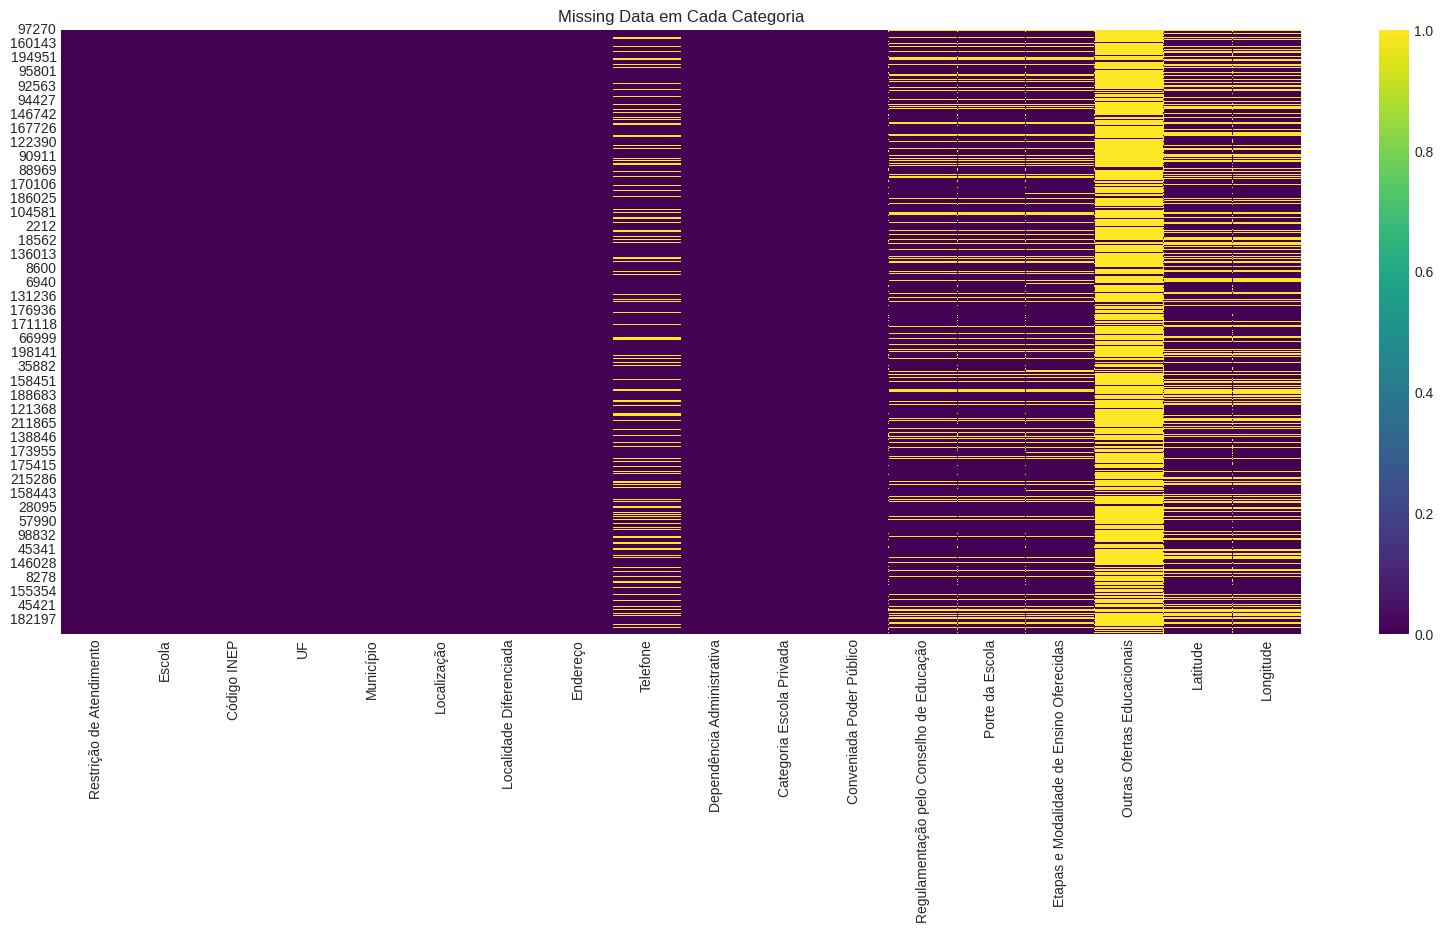

In [37]:
simple_EDA(X_train)

A partir dos gráficos acima, podemos inferir:    


*   A grande maioria das variáveis (83.3%) correspondem a variáveis categóricas, 11.1% das variáveis são números racionais (float) e 5.56% são variáveis correspondentes a números inteiros.
*   Nos dados referentes ao treinamento, existem 138181 escolas, em 5284 municípios, 147977 endereços distintos e 102363 números telefônicos.
*   Dessa maneira, a variável com maior cardinalidade, nas amostras de treinamento, é a variável **Endereço**.
*   Há falta de dados nas variáveis **Latitude** (13.6%), **Longitude** (13.6%), **Telefone** (9.27%), **Etapas e Modalidade de Ensino Oferecidas** (8.44%), **Porte da Escola** (8.04%), **Regulamentação pelo Conselho de Educação** (8.04%) e **Outras Ofertas Educacionais** (38.9%). Sendo esta última a variável mais responsável por dados faltantes.
*   A falta de dados nas variáveis **Latitude** e **Longitude** não é aleatória, visto que quando uma está faltante, a outra variavel também está. Ademais, isto também ocorre com as variáveis **Porte da Escola** e **Regulamentação pelo Conselho de Educação**.







## Distribuição das variáveis categóricas.

---



In [93]:
def verify_pct_of_categories(X_train,feature_names):
  total_samples=len(X_train)
  for feature in feature_names:
    temp_df=pd.Series(X_train[feature].value_counts()/total_samples)
    fig=temp_df.sort_values(ascending=False).plot.bar(color="blue")
    fig.axhline(y=0.05,color='orange')
    fig.set_ylabel(f'Percentual of {feature}')
    plt.show()

def get_categorical_variables(df):
    return df.select_dtypes(include='object').columns

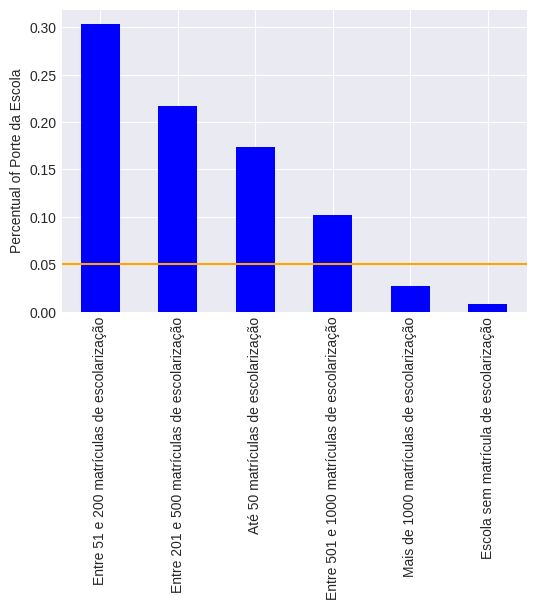

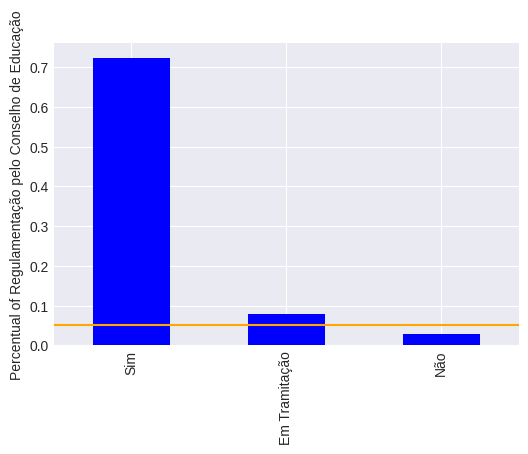

In [73]:
verify_pct_of_categories(X_train,['Porte da Escola', 'Regulamentação pelo Conselho de Educação'])

## Distribuiçao das variáveis numéricas.

In [94]:
def diagnostic_plots(df,variable,lib):
  
  if lib=='matplotlib' or lib=='pyplot':
    #function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data=df, x=variable, kde=True,color='#E0B100',stat="density")
    plt.title('Histogram')
  
    # Q-Q plot
    ax=plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    ax.get_lines()[0].set_markersize(7.0)
    ax.get_lines()[0].set_markerfacecolor('#44B1A5')
    ax.get_lines()[0].set_color('#44B1A5')

    ax.get_lines()[1].set_markerfacecolor('#FF7627')
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=variable, data=df,color='#FFCC00',linewidth=2.5)
    sns.swarmplot(y=variable, data=df.iloc[0:300], color="#FFE680")
    plt.title('Boxplot')

    plt.suptitle('Distribuição de '+ variable, fontsize=16)
    plt.show()

  else:
    print('Escolha como library (argumento lib) ou "matplotlib" ou "plotly"!')

def get_numerical_variables(df):
    return df.select_dtypes(exclude='object').columns



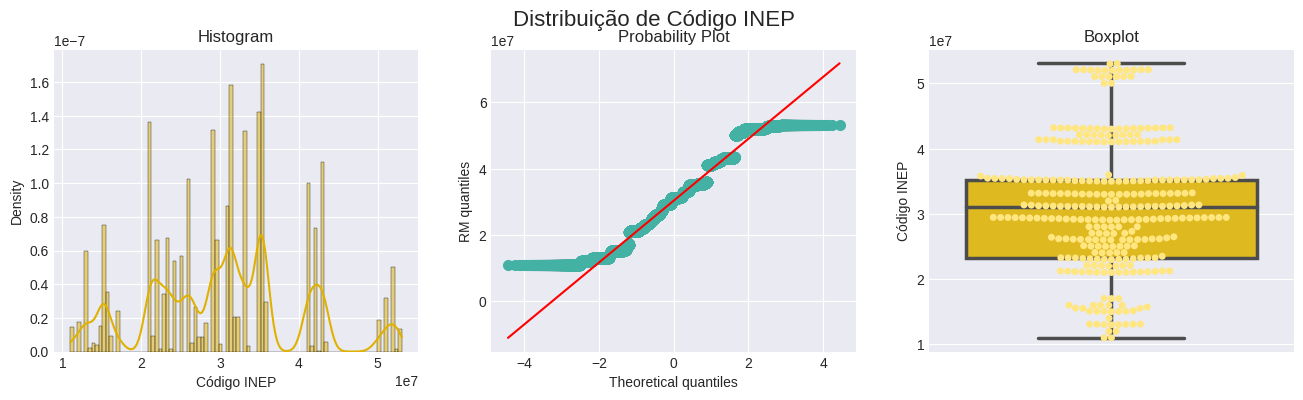

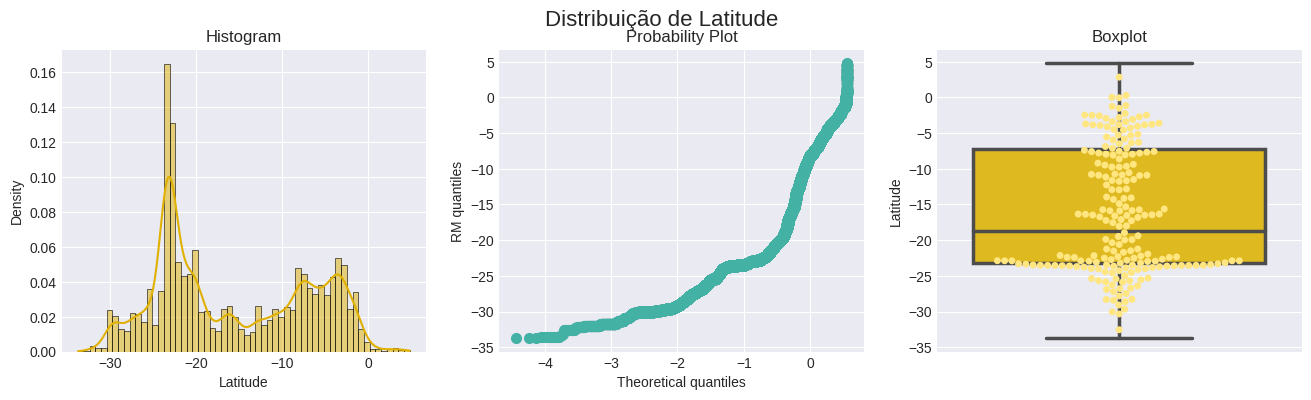

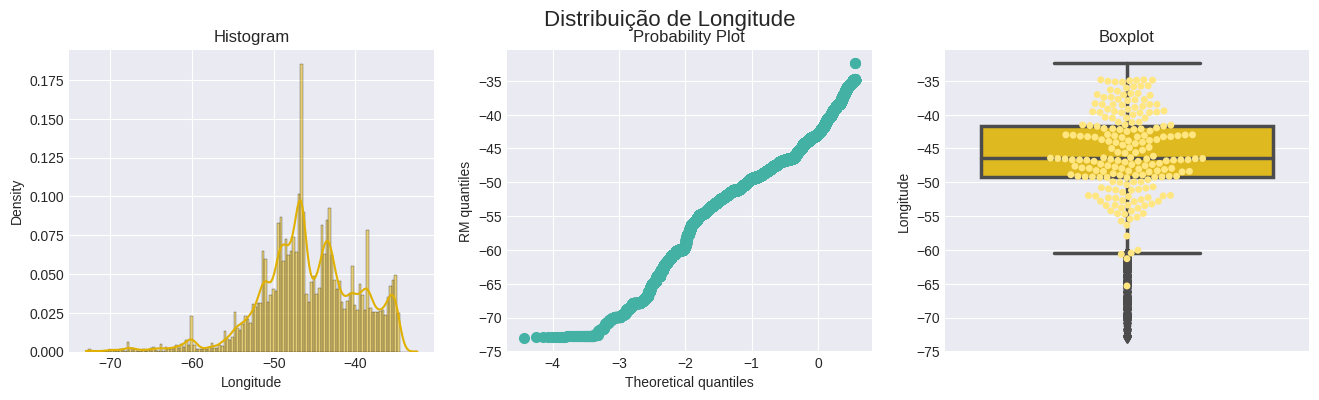

In [41]:
for feature in get_numerical_variables(X_train):
  diagnostic_plots(X_train,feature,'matplotlib')

## Determinar o perfil da escola privada.

Primeiro, separar as variáveis categóricas das numpericas.

In [75]:
categorial_features=get_categorical_variables(X_train).tolist()
numeric_features=get_numerical_variables(X_train).tolist()

### Substituir dados faltantes nas variáveis categoricas:       

Adicionar a nova categoria "Missing", de modo a permitir o modelo identificar o motivo da falta nessa instância, caso existir.

In [95]:
from feature_engine.imputation import CategoricalImputer

# set up the imputer
categorical_imputer = CategoricalImputer()

# fit the imputer
categorical_imputer.fit(X_train)

# transform the data
X_train= categorical_imputer.transform(X_train)
X_valid= categorical_imputer.transform(X_valid)
X_test= categorical_imputer.transform(X_test)

Verificar a nova distribuição de duas das variáveis categóricas que apresentaram dados faltantes:

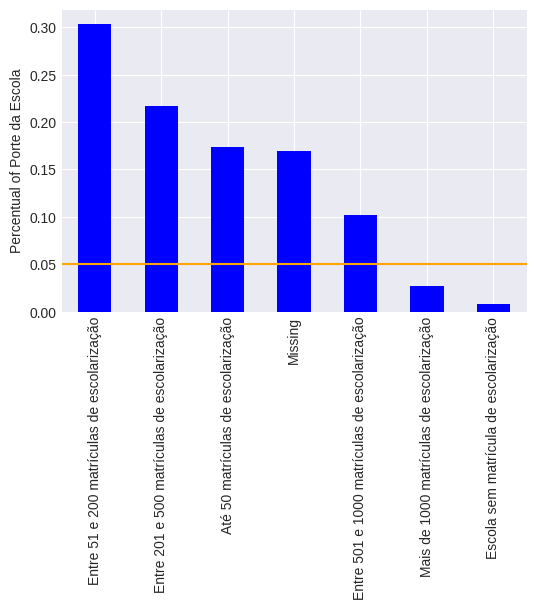

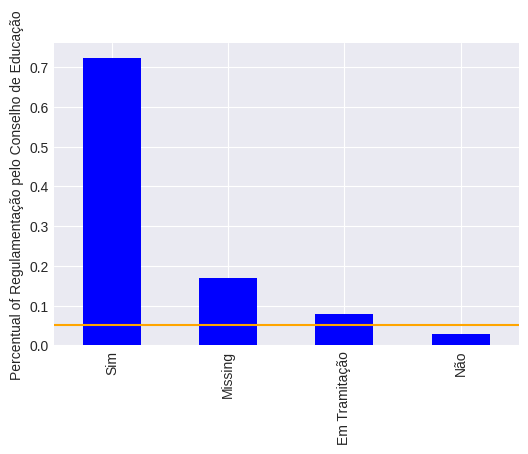

In [44]:
verify_pct_of_categories(X_train,['Porte da Escola', 'Regulamentação pelo Conselho de Educação'])

Logo, a categoria "Missing" foi de fato adicionada neste dataset.

## Incidência de escolas privadas por categoria das variáveis categóricas.

In [96]:
from feature_engine.encoding import MeanEncoder

def category_impact_on_target(X_train,y_train,y_name,feature_names):
  # set up the encoder
  mean_encoder = MeanEncoder(variables=feature_names)
  # fit the encoder
  mean_encoder.fit(X_train, y_train[y_name].tolist())
  for feature in mean_encoder.encoder_dict_:
    mean_dict=mean_encoder.encoder_dict_[feature].copy()
    for category in mean_dict: 
      mean_dict[category]=[mean_dict[category]]
    temp_df=pd.DataFrame.from_dict(mean_dict,orient='index')
    temp_df=temp_df.rename(columns={0:'Positive Mean Probability of Each Category'})
    fig=temp_df.sort_values(ascending=False,by='Positive Mean Probability of Each Category').plot.bar(color="#2ab7ca",label=feature)
    temp_df=temp_df.sort_values(ascending=False,by='Positive Mean Probability of Each Category')
    fig.axhline(y=y_train[y_name].mean(),color='#fe4a49',label=f"Entire DataSet's Mean Positive Probability ({round(100*y_train[y_name].mean(),2)} %)")
    fig.set_ylabel(f'Positive Mean Probability of {feature}')
    for index,data in enumerate(temp_df['Positive Mean Probability of Each Category'].tolist()):
      plt.text(x=index-0.16 , y =data+0.02*data , s=f"{round(100*data,2)} %")
    plt.legend(loc="lower left")
    plt.show()

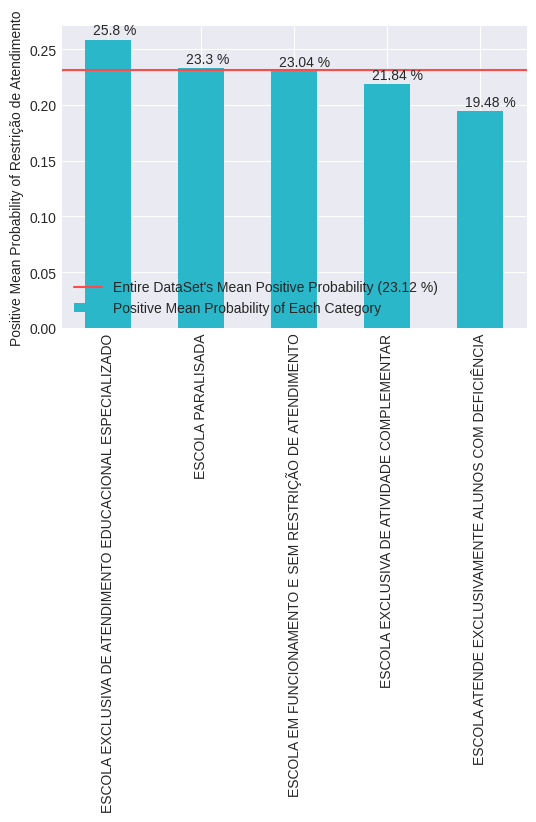

KeyboardInterrupt: ignored

In [47]:
category_impact_on_target(X_train,y_train,'Categoria Administrativa',categorial_features)

## Incidência de escolas privadas por categoria das variáveis numéricas.

In [97]:
def numeric_impact_on_target(X_train,y_train,y_name,feature_names):
  
  positive_X_train=X_train.loc[y_train[y_train[y_name]==1].index]
  negative_X_train=X_train.loc[y_train[y_train[y_name]==0].index]

  for feature in feature_names:
    sns.histplot(data=negative_X_train, x=feature, kde=True,stat="density",label=f'{y_name}=0')
    sns.histplot(data=positive_X_train, x=feature, kde=True,color='#E0B100',stat="density",label=f'{y_name}=1')
    plt.legend()
    plt.show()

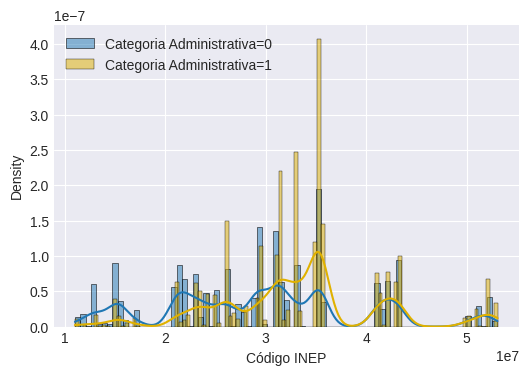

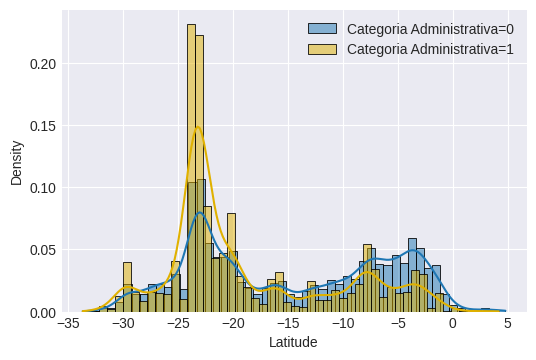

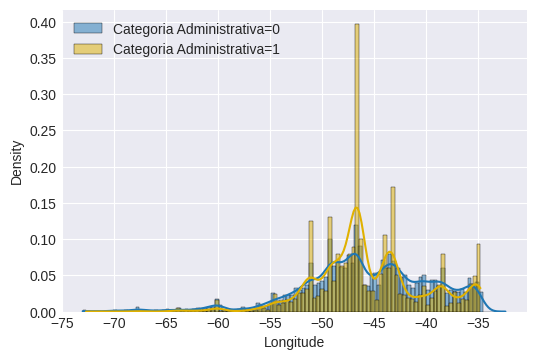

In [79]:
numeric_impact_on_target(X_train,y_train,'Categoria Administrativa',numeric_features)

Dessa forma:

*   A maior parte das escolas privadas possui INEP variando entre 1 e 5.
*   A maior concentração de escolas privadas encontram-se na seguinte faixa de latitude: entre -25 e -20.
*   Já com relação à longitude, a grande maioria das escolas privadas está entre -55 e -35, com uma maior concentração entre -50 e -45.



#Processamento

## Rare Labels

In [98]:
from feature_engine.encoding import RareLabelEncoder
# set up the encoder
encoder = RareLabelEncoder(tol=0.05, n_categories=6, variables=categorial_features,replace_with='Rare')

# fit the encoder
encoder.fit(X_train)

# transform the data
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)
X_valid = encoder.transform(X_valid)

/usr/local/lib/python3.7/dist-packages/feature_engine/encoding/rare_label.py:182: UserWarning:

The number of unique categories for variable Restrição de Atendimento is less than that indicated in n_categories. Thus, all categories will be considered frequent

/usr/local/lib/python3.7/dist-packages/feature_engine/encoding/rare_label.py:182: UserWarning:

The number of unique categories for variable Localização is less than that indicated in n_categories. Thus, all categories will be considered frequent

/usr/local/lib/python3.7/dist-packages/feature_engine/encoding/rare_label.py:182: UserWarning:

The number of unique categories for variable Localidade Diferenciada is less than that indicated in n_categories. Thus, all categories will be considered frequent

/usr/local/lib/python3.7/dist-packages/feature_engine/encoding/rare_label.py:182: UserWarning:

The number of unique categories for variable Dependência Administrativa is less than that indicated in n_categories. Thus, all categori

## Categorical Encoding

Também por uma questão de simplicidade, utilizaremos o **MeanEncoder**.

> Bloco com recuo



In [99]:
mean_encoder = MeanEncoder(variables=categorial_features)

mean_encoder.fit(X_train, y_train['Categoria Administrativa'].tolist())

X_train= mean_encoder.transform(X_train)
X_valid= mean_encoder.transform(X_valid)
X_test= mean_encoder.transform(X_test)

/usr/local/lib/python3.7/dist-packages/feature_engine/encoding/base_encoder.py:158: UserWarning:

NaN values were introduced in the returned dataframe by the encoder.This means that some of the categories in the input dataframe were not present in the training set used when the fit method was called. Thus, mappings for those categories do not exist. Try using the RareLabelCategoricalEncoder to remove infrequent categories before calling this encoder.



In [100]:
X_train

,Restrição de Atendimento,Escola,Código INEP,UF,Município,Localização,Localidade Diferenciada,Endereço,Telefone,Dependência Administrativa,Categoria Escola Privada,Conveniada Poder Público,Regulamentação pelo Conselho de Educação,Porte da Escola,Etapas e Modalidade de Ensino Oferecidas,Outras Ofertas Educacionais,Latitude,Longitude
97270,0.230395,0.230844,29376629,0.231392,0.230844,0.231460,0.230459,0.230844,0.229900,0.231820,0.232104,0.231169,0.230813,0.230337,0.229005,0.231730,NaN,NaN
211108,0.230395,0.230844,51089084,0.229960,0.230844,0.230343,0.230459,0.230844,0.229900,0.226886,0.203704,0.231169,0.230390,0.229808,0.228873,0.231730,-15.892600,-52.263450
131683,0.232959,0.230844,33002339,0.233681,0.230844,0.231460,0.232959,0.230844,0.233594,0.231419,0.232104,0.231169,0.232959,0.232959,0.233386,0.231730,NaN,NaN
46490,0.230395,0.230844,23001704,0.229960,0.230844,0.230343,0.230459,0.230844,0.229900,0.231820,0.232104,0.231169,0.230390,0.229808,0.229005,0.231730,-2.935851,-41.162350
139336,0.230395,0.230844,33126976,0.233681,0.230844,0.230343,0.230459,0.230844,0.229900,0.226886,0.224750,0.231169,0.230390,0.229808,0.227305,0.231730,-22.934050,-42.488740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54553,0.230395,0.230844,23249366,0.229960,0.230844,0.231460,0.219024,0.230844,0.229900,0.231820,0.232104,0.231169,0.230813,0.229808,0.239200,0.231730,-4.134693,-38.497760
112665,0.232959,0.230844,31160474,0.231110,0.230844,0.231460,0.232959,0.230844,0.233594,0.231820,0.232104,0.231169,0.232959,0.232959,0.233386,0.231730,NaN,NaN
178667,0.230395,0.230844,41018362,0.229960,0.230844,0.230343,0.230459,0.230844,0.229900,0.231820,0.232104,0.231169,0.230390,0.232162,0.229005,0.231730,-24.586963,-52.287316
51479,0.232959,0.230844,23151129,0.229960,0.230844,0.231460,0.232959,0.230844,0.229900,0.231820,0.232104,0.231169,0.232959,0.232959,0.233386,0.231730,NaN,NaN


## Missing Indicator

A fim de não perder informações de dados faltantes.

In [101]:
from feature_engine.imputation import AddMissingIndicator

missing_indicator_encoder = AddMissingIndicator(variables=numeric_features)

missing_indicator_encoder.fit(X_train, y_train['Categoria Administrativa'].tolist())

X_train= missing_indicator_encoder.transform(X_train)
X_valid= missing_indicator_encoder.transform(X_valid)
X_test= missing_indicator_encoder.transform(X_test)

In [102]:
X_train

,Restrição de Atendimento,Escola,Código INEP,UF,Município,Localização,Localidade Diferenciada,Endereço,Telefone,Dependência Administrativa,Categoria Escola Privada,Conveniada Poder Público,Regulamentação pelo Conselho de Educação,Porte da Escola,Etapas e Modalidade de Ensino Oferecidas,Outras Ofertas Educacionais,Latitude,Longitude,Latitude_na,Longitude_na
97270,0.230395,0.230844,29376629,0.231392,0.230844,0.231460,0.230459,0.230844,0.229900,0.231820,0.232104,0.231169,0.230813,0.230337,0.229005,0.231730,NaN,NaN,1,1
211108,0.230395,0.230844,51089084,0.229960,0.230844,0.230343,0.230459,0.230844,0.229900,0.226886,0.203704,0.231169,0.230390,0.229808,0.228873,0.231730,-15.892600,-52.263450,0,0
131683,0.232959,0.230844,33002339,0.233681,0.230844,0.231460,0.232959,0.230844,0.233594,0.231419,0.232104,0.231169,0.232959,0.232959,0.233386,0.231730,NaN,NaN,1,1
46490,0.230395,0.230844,23001704,0.229960,0.230844,0.230343,0.230459,0.230844,0.229900,0.231820,0.232104,0.231169,0.230390,0.229808,0.229005,0.231730,-2.935851,-41.162350,0,0
139336,0.230395,0.230844,33126976,0.233681,0.230844,0.230343,0.230459,0.230844,0.229900,0.226886,0.224750,0.231169,0.230390,0.229808,0.227305,0.231730,-22.934050,-42.488740,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54553,0.230395,0.230844,23249366,0.229960,0.230844,0.231460,0.219024,0.230844,0.229900,0.231820,0.232104,0.231169,0.230813,0.229808,0.239200,0.231730,-4.134693,-38.497760,0,0
112665,0.232959,0.230844,31160474,0.231110,0.230844,0.231460,0.232959,0.230844,0.233594,0.231820,0.232104,0.231169,0.232959,0.232959,0.233386,0.231730,NaN,NaN,1,1
178667,0.230395,0.230844,41018362,0.229960,0.230844,0.230343,0.230459,0.230844,0.229900,0.231820,0.232104,0.231169,0.230390,0.232162,0.229005,0.231730,-24.586963,-52.287316,0,0
51479,0.232959,0.230844,23151129,0.229960,0.230844,0.231460,0.232959,0.230844,0.229900,0.231820,0.232104,0.231169,0.232959,0.232959,0.233386,0.231730,NaN,NaN,1,1


## Transformações de variáveis

Vamos usar a transformação de Yeo Johnson como transformação base de todas as variáveis, pios é uma transformação muito bem avaliada para modelos de Machine Learning.

Mas primeiro, precisamos contornar o fato de que existem células NaN nas latitudes e longitudes que irão impedir a transformação de YeoJohnson.

In [107]:
X_train['Latitude'].fillna(0, inplace = True)
X_train['Longitude'].fillna(0, inplace = True)
X_train.fillna(0, inplace=True)
X_valid.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
X_train

,Restrição de Atendimento,Escola,Código INEP,UF,Município,Localização,Localidade Diferenciada,Endereço,Telefone,Dependência Administrativa,Categoria Escola Privada,Conveniada Poder Público,Regulamentação pelo Conselho de Educação,Porte da Escola,Etapas e Modalidade de Ensino Oferecidas,Outras Ofertas Educacionais,Latitude,Longitude,Latitude_na,Longitude_na
97270,12.898748,0.322902,493852.550595,101287.330137,0.322902,0.003011,1.809382,0.322902,0.003011,6.526567,1.151670e+30,1.816460e+152,0.007358,2.542531e+23,0.003988,2.517859e+83,0.000000,0.000000,0.227041,0.227041
211108,12.898748,0.322902,745956.922118,92691.112738,0.322902,0.003011,1.809382,0.322902,0.003011,5.915443,2.612314e+26,1.816460e+152,0.007358,2.246657e+23,0.003988,2.517859e+83,-4.885977,-21.426085,-0.000000,-0.000000
131683,13.689539,0.322902,538600.959042,116683.367919,0.322902,0.003011,1.873268,0.322902,0.003011,6.474760,1.151670e+30,1.816460e+152,0.007358,4.686571e+23,0.003988,2.517859e+83,0.000000,0.000000,0.227041,0.227041
46490,12.898748,0.322902,411542.334011,92691.112738,0.322902,0.003011,1.809382,0.322902,0.003011,6.526567,1.151670e+30,1.816460e+152,0.007358,2.246657e+23,0.003988,2.517859e+83,-1.767654,-17.993162,-0.000000,-0.000000
139336,12.898748,0.322902,540116.247562,116683.367919,0.322902,0.003011,1.809382,0.322902,0.003011,5.915443,1.335948e+29,1.816460e+152,0.007358,2.246657e+23,0.003988,2.517859e+83,-5.904802,-18.416657,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54553,12.898748,0.322902,414840.370950,92691.112738,0.322902,0.003011,1.541676,0.322902,0.003011,6.526567,1.151670e+30,1.816460e+152,0.007358,2.246657e+23,0.003988,2.517859e+83,-2.222764,-17.129930,-0.000000,-0.000000
112665,13.689539,0.322902,516034.451606,99529.668307,0.322902,0.003011,1.873268,0.322902,0.003011,6.526567,1.151670e+30,1.816460e+152,0.007358,4.686571e+23,0.003988,2.517859e+83,0.000000,0.000000,0.227041,0.227041
178667,12.898748,0.322902,633357.648004,92691.112738,0.322902,0.003011,1.809382,0.322902,0.003011,6.526567,1.151670e+30,1.816460e+152,0.007358,3.891607e+23,0.003988,2.517859e+83,-6.114979,-21.433216,-0.000000,-0.000000
51479,13.689539,0.322902,413533.255686,92691.112738,0.322902,0.003011,1.873268,0.322902,0.003011,6.526567,1.151670e+30,1.816460e+152,0.007358,4.686571e+23,0.003988,2.517859e+83,0.000000,0.000000,0.227041,0.227041


In [108]:
from feature_engine import transformation as vt

yeojohnson_transform=vt.YeoJohnsonTransformer(variables=X_train.columns.tolist())

yeojohnson_transform.fit(X_train)

X_train=yeojohnson_transform.transform(X_train)
X_valid=yeojohnson_transform.transform(X_valid)
X_test=yeojohnson_transform.transform(X_test)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1478: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1986: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1987: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1984: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:192: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning:

overflow encountered in multiply



In [109]:
X_train

,Restrição de Atendimento,Escola,Código INEP,UF,Município,Localização,Localidade Diferenciada,Endereço,Telefone,Dependência Administrativa,Categoria Escola Privada,Conveniada Poder Público,Regulamentação pelo Conselho de Educação,Porte da Escola,Etapas e Modalidade de Ensino Oferecidas,Outras Ofertas Educacionais,Latitude,Longitude,Latitude_na,Longitude_na
97270,12.404635,12.51917,493853.289615,1.465270e+06,12.51917,0.003026,1.677958,12.51917,0.003026,6.301148,0.46777,0.46777,0.007284,0.46777,0.00398,0.46777,0.000000,0.000000,0.067019,0.067019
211108,12.404635,12.51917,745958.076414,1.311364e+06,12.51917,0.003026,1.677958,12.51917,0.003026,5.721268,0.46777,0.46777,0.007284,0.46777,0.00398,0.46777,-4.468332,-17.084084,-0.000000,-0.000000
131683,13.151814,12.51917,538601.770798,1.749089e+06,12.51917,0.003026,1.733967,12.51917,0.003026,6.252040,0.46777,0.46777,0.007284,0.46777,0.00398,0.46777,0.000000,0.000000,0.067019,0.067019
46490,12.404635,12.51917,411542.940587,1.311364e+06,12.51917,0.003026,1.677958,12.51917,0.003026,6.301148,0.46777,0.46777,0.007284,0.46777,0.00398,0.46777,-1.686740,-14.560991,-0.000000,-0.000000
139336,12.404635,12.51917,540117.061790,1.749089e+06,12.51917,0.003026,1.677958,12.51917,0.003026,5.721268,0.46777,0.46777,0.007284,0.46777,0.00398,0.46777,-5.347779,-14.874602,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54553,12.404635,12.51917,414840.982796,1.311364e+06,12.51917,0.003026,1.441456,12.51917,0.003026,6.301148,0.46777,0.46777,0.007284,0.46777,0.00398,0.46777,-2.103952,-13.919515,-0.000000,-0.000000
112665,13.151814,12.51917,516035.226622,1.433524e+06,12.51917,0.003026,1.733967,12.51917,0.003026,6.301148,0.46777,0.46777,0.007284,0.46777,0.00398,0.46777,0.000000,0.000000,0.067019,0.067019
178667,12.404635,12.51917,633358.615257,1.311364e+06,12.51917,0.003026,1.677958,12.51917,0.003026,6.301148,0.46777,0.46777,0.007284,0.46777,0.00398,0.46777,-5.527872,-17.089282,-0.000000,-0.000000
51479,13.151814,12.51917,413533.865444,1.311364e+06,12.51917,0.003026,1.733967,12.51917,0.003026,6.301148,0.46777,0.46777,0.007284,0.46777,0.00398,0.46777,0.000000,0.000000,0.067019,0.067019


##Feature Scalling

A transformação a seguir garante que a maior parte das incidências fique no intervalo entre -1 e 1, pois Modelos de Machine Learning funcionam melhor quando as variáveis estão nesse intervalo.

In [110]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train)

X_train=pd.DataFrame(scaler.transform(X_train),columns=X_train.columns,index=X_train.index)
X_valid=pd.DataFrame(scaler.transform(X_valid),columns=X_valid.columns,index=X_valid.index)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

#Modelagem

## Modelo utilizado

Por simplicidade iremos utilizar uma **RandomForest**, visto que esse modelo funciona para uma grande gama de casos.

In [127]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2021) # Setamos a seed para reprodutibilidade

Treinando o modelo:

In [128]:
model.fit(X_train,y_train['Categoria Administrativa'].tolist())

RandomForestClassifier(random_state=2021)

Precisão do modelo com os dados do treinamento:     

In [129]:
print('O modelo possui precisão de ', round(100*model.score(X_train,y_train['Categoria Administrativa'].tolist()),2),'% nos dados de treino!!')

O modelo possui precisão de  100.0 % nos dados de treino!!


Precisão do modelo nos dados de validação:     

In [130]:
print('O modelo possui precisão de ', round(100*model.score(X_valid,y_valid['Categoria Administrativa'].tolist()),2),'% nos dados de validação!!')

O modelo possui precisão de  23.38 % nos dados de validação!!


A queda foi considerada, o que indica a necessidade de optimizar o nosso algoritmo. O algoritmo **RandomForest**, por ser mais simples, pode ser optimizado alterando alguns paramêtros da função.

##Optimização do modelo

In [139]:
model = RandomForestClassifier(max_depth=3,
                               max_features=8)

In [140]:
model.fit(X_train,y_train['Categoria Administrativa'].tolist())

RandomForestClassifier(max_depth=3, max_features=8)

In [141]:
print('O modelo acerta cerca de ', round(100*model.score(X_train,y_train['Categoria Administrativa'].tolist()),2),'% nos dados de treino!!')

O modelo acerta cerca de  100.0 % nos dados de treino!!


In [142]:
print('O modelo acerta cerca de ', round(100*model.score(X_valid,y_valid['Categoria Administrativa'].tolist()),2),'% nos dados de validação!!')

O modelo acerta cerca de  23.38 % nos dados de validação!!


#Análise do desempenho

Precisão do modelo nos casos de teste:    

In [144]:
print('O modelo possui precisão de ', round(100*model.score(X_test,y_test['Categoria Administrativa'].tolist()),2),'% nos dados de teste!!')

O modelo acerta cerce de  23.09 % nos dados de teste!!


Interessante o fato de que a precisão nos teste e na validação são próximas, porém distantes do que fora obtido no treinamento. Isto pode ser devido ao desbalanceamento do dataset ou, talvez, algum equívoco cometido na hora de realizar as transformações.

Verificando outros parâmetros importantes:       

In [148]:
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score,roc_auc_score

f1_score=f1_score(y_test['Categoria Administrativa'].tolist(),model.predict(X_test))
accuracy=accuracy_score(y_test['Categoria Administrativa'].tolist(),model.predict(X_test))
precision=precision_score(y_test['Categoria Administrativa'].tolist(),model.predict(X_test))
recall=recall_score(y_test['Categoria Administrativa'].tolist(),model.predict(X_test))
auc=roc_auc_score(y_test['Categoria Administrativa'].tolist(),model.predict(X_test))


print('O ROC-AUC do modelo:', auc)
print('A Acurácia do modelo:', accuracy)
print('A Precisão do modelo:', precision)
print('O F1-Score do modelo:', f1_score)
print('O Recall do modelo:', recall)


O ROC-AUC do modelo: 0.5
A Acurácia do modelo: 0.23094321168775597
A Precisão do modelo: 0.23094321168775597
O F1-Score do modelo: 0.37522967671450563
O Recall do modelo: 1.0


# Matriz de Confusão

In [149]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, class_names, normalize=None,
                          title='Confusion Matrix', plot_numbers=False, display_names=None,
                          figsize=(15, 11)):

    cm = confusion_matrix(y_true, y_pred, labels=class_names, normalize=normalize)
    
    if not display_names:
        display_names = class_names
    df_cm = pd.DataFrame(cm, index=display_names, columns=display_names)
    sns.heatmap(df_cm, annot=True,fmt='g',cmap='hot')
    plt.setp(plt.gca().get_xticklabels(), ha="right", rotation=45)
    plt.setp(plt.gca().get_yticklabels(), ha="right", rotation=45)
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predito pelo Modelo')
    plt.title(title)
    plt.show()

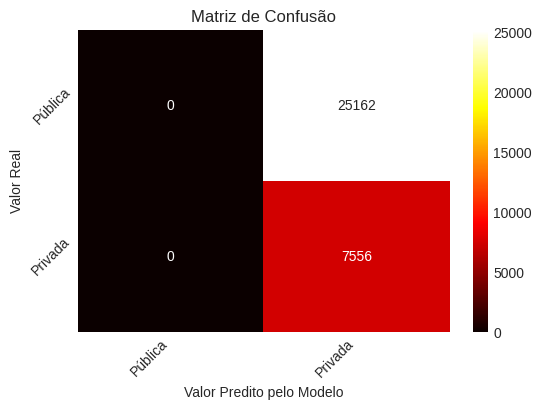

In [152]:
plot_confusion_matrix(y_true=y_test['Categoria Administrativa'].tolist(),
                      y_pred=model.predict(X_test),
                      class_names=[0,1],
                      display_names=['Pública','Privada'],
                      title='Matriz de Confusão')

Esse resultado mostra que algo foi implementado equivocadamente no nosso modelo, pois essa matriz de confusão indica que não houve acertos no modelo para determinar se a escola é públicae não houve erros ao determinar se a escola é privada, o que é contraditório com o que foi obtido anteriormente. Pode ser que o equívoco foi transformar dados NaN em zeros antes de realizar a transformação de Yeo Johnson, essa é uma possibilidade. Provavelmente, encontrar um método alternativo para o que fora feito opmizaria o modelo.

# Ferramentas Importantes

Obter o Feature Importance para o modelo da **RandomForest** é relativamente simples. Basta utilizar a função abaixo:      

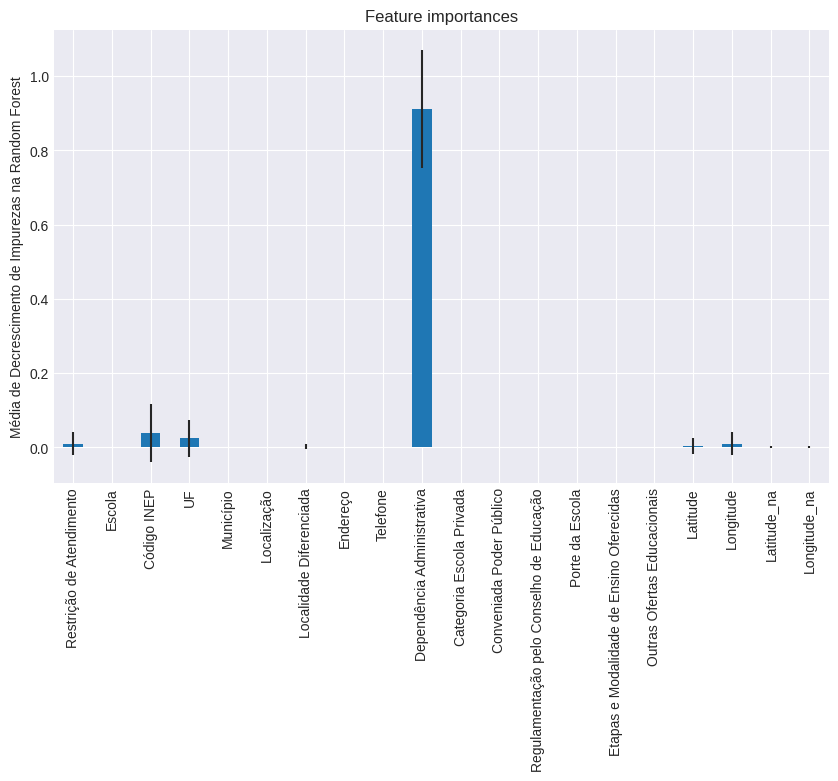

In [153]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
feature_names = X_train.columns.tolist()
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots(figsize=(10,6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Média de Decrescimento de Impurezas na Random Forest")
plt.show()